### Compare speed of different ways to generate random integers within a certain range

We define the boundary values as nmin and nmax-1

In [1]:
import numpy as np
import random
nmin, nmax = 0, 10

In [2]:
# use numpy randint
%timeit np.random.randint(nmax)

2.44 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
# use numpy random and then tranform manually
%timeit int(np.floor(np.random.random()*nmax))

1.28 µs ± 28.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [4]:
# use standard library randint
%timeit random.randint(0,nmax-1)

976 ns ± 25.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
# use standard library randrange
%timeit random.randrange(nmax)

722 ns ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [6]:
# use standard library choice
%timeit random.choice([0,1,2,3,4,5,6,7,8,9])

809 ns ± 34.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
# use standard library random and then transform manually
%timeit int(np.floor(random.random()*nmax))

1.06 µs ± 97.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Now compare different implementations of diffusion limited aggregation model

First variant: particles randomly jump to neraest neighbor positions on square lattice

31.292208909988403 seconds


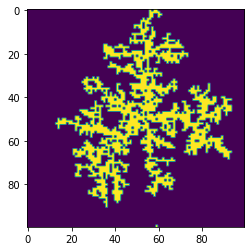

In [8]:
'''
square NN random walk with PBC using nupmy randint (my first version, very slow)
'''
import numpy as np
import matplotlib.pyplot as plt
import time

# Side length of cell:
L = 100
# Number of particles
particles = 2000
# jump vectors for random walk
jumps = np.array([[0, 1], [0, -1], [-1, 0], [1, 0]])

# initialize world
world = np.zeros((L,L))
world[round(L/2), round(L/2)] = 1

start_time = time.time()
# now release one particle after another until they bind to the aggregate
for n in range(particles):
    # start at random position
    p = np.array([np.random.randint(L), np.random.randint(L)])
  
    while True:
        pnext = p + jumps[np.random.randint(4)]
        if world[pnext[0]%L,pnext[1]%L] == 1:
            world[p[0],p[1]] = 1
            break
        else:
            p = pnext%L

print(time.time() - start_time, "seconds")

plt.imshow(world)
plt.show()

22.64003610610962 seconds


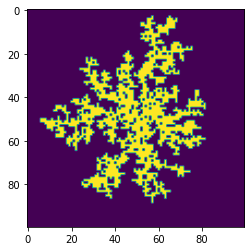

In [9]:
'''
square NN random walk with PBC using std lib randrange (nearly factor 2 faster)
'''
import numpy as np
import matplotlib.pyplot as plt
import time
import random

# Side length of cell:
L = 100
# Number of particles
particles = 2000
# jump vectors for random walk
jumps = np.array([[0, 1], [0, -1], [-1, 0], [1, 0]])

# initialize world
world = np.zeros((L,L))
world[round(L/2), round(L/2)] = 1

start_time = time.time()
# now release one particle after another until they bind to the aggregate
for n in range(particles):
    # start at random position
    p = np.array([random.randrange(L), random.randrange(L)])
  
    while True:
        pnext = p + jumps[random.randrange(4)]
        if world[pnext[0]%L,pnext[1]%L] == 1:
            world[p[0],p[1]] = 1
            break
        else:
            p = pnext%L

print(time.time() - start_time, "seconds")

plt.imshow(world)
plt.show()

9.611096858978271 seconds


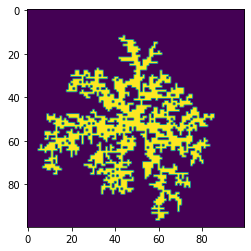

In [22]:
'''
square NN random walk with PBC using std lib randrange and less numpy arrays (px and py instead of p)
'''
import numpy as np
import matplotlib.pyplot as plt
import time
import random

# Side length of cell:
L = 100
# Number of particles
particles = 2000

# initialize world
world = np.zeros((L,L))
world[round(L/2), round(L/2)] = 1

start_time = time.time()
# now release one particle after another until they bind to the aggregate
for n in range(particles):
    # start at random position
    px, py = random.randrange(L), random.randrange(L)

    while True:
        dx = random.choice([-1, 0, 0, 1])
        if dx == 0:
            dy = random.choice([-1, 1])
        else:
            dy = 0
            

        pxnext = (px + dx)%L
        pynext = (py + dy)%L

        if world[pxnext,pynext] == 1:
            world[px,py] = 1
            break
        else:
            px, py = pxnext, pynext

print(time.time() - start_time, "seconds")
 

plt.imshow(world)
plt.show()

6.308985233306885 seconds
(100, 100)


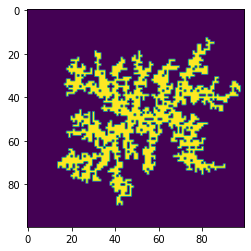

In [3]:
'''
square NN random walk with PBC using std lib randrange and less numpy arrays (px and py instead of p)
'''
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import secrets
# Side length of cell:
L = 100
# Number of particles
particles = 2000

# initialize world
world = np.zeros((L,L))
world[round(L/2), round(L/2)] = 1
possible_jumps =  [[0,-1], [0,1], [-1,0], [1,0]]
start_time = time.time()
# now release one particle after another until they bind to the aggregate
for n in range(particles):
    # start at random position
    px, py = random.randrange(L), random.randrange(L)
 
    while True:
        
        jump = random.choice(possible_jumps) 

        pxnext = (px + jump[0])%L
        pynext = (py + jump[1])%L

        if world[pxnext,pynext] == 1:
            world[px,py] = 1
            break
        else:
            px, py = pxnext, pynext
    
print(time.time() - start_time, "seconds")
 
print(world.shape)
plt.imshow(world)
plt.show()